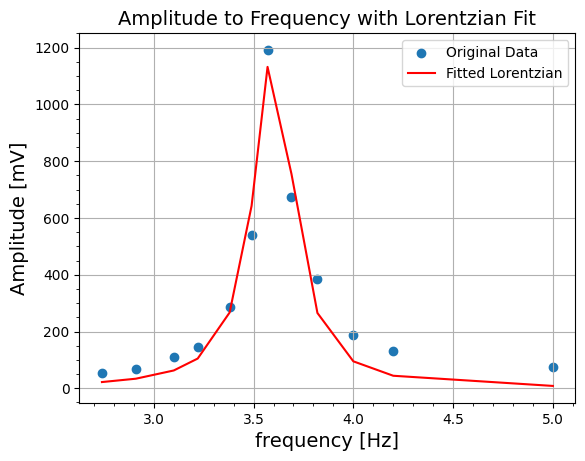

Fitted Parameters:
x0: 3.5995539355788218
gamma: 0.1171971277308071
A: 443.36665605297327
<bound method Series.max of 0       21.977804
1       33.808515
2       62.819852
3      104.817344
4      267.033195
5      642.640799
6     1132.195621
7      754.702212
8      265.351539
9       95.005942
10      44.192072
11       8.374646
Name: freq [Hz], dtype: float64>


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# Function to fit Lorentzian and plot the data
def fit_and_plot_lorentzian(df):
    x_data = df["freq [Hz]"]
    y_data = df["Amp [mV]"]

    # Fit the Lorentzian function to the data using curve_fit
    initial_guess = [100, 10, 1]  # Initial guess for x0, gamma, and A
    params, covariance = curve_fit(lorentzian, x_data, y_data, p0=initial_guess)

    # Plot the original data and the fitted Lorentzian function
    plt.scatter(x_data, y_data, label='Original Data')
    plt.plot(x_data, lorentzian(x_data, *params), 'r-', label='Fitted Lorentzian')
    plt.xlabel('frequency [Hz]', fontsize=14)
    plt.ylabel('Amplitude [mV]', fontsize=14)
    plt.minorticks_on()
    plt.grid('minor')
    plt.title('Amplitude to Frequency with Lorentzian Fit', fontsize=14)
    plt.legend()
    plt.show()

    # Display the fitted parameters
    print("Fitted Parameters:")
    print(f"x0: {params[0]}")
    print(f"gamma: {params[1]}")
    print(f"A: {params[2]}")

# Read the CSV file and call the fit_and_plot_lorentzian function
df = pd.read_csv('amp_vs_freq.csv')
fit_and_plot_lorentzian(df)


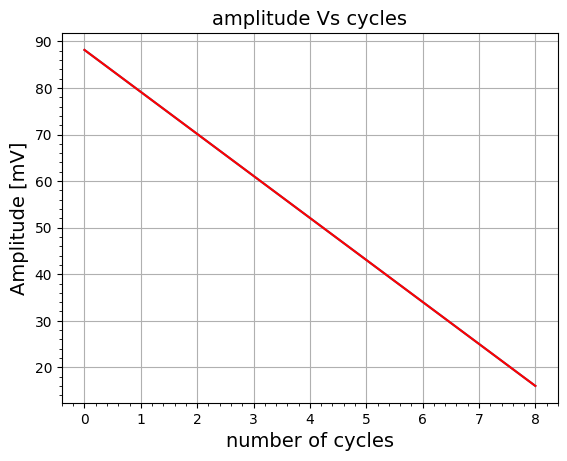

[88.18 16.01]


In [18]:
# First Graph - stress to strain
df = pd.read_csv('decay.csv')
plt.plot(df["n"] , df["A"])
coefficients = np.polyfit(df["n"], df["A"], 1)
fit_function = np.poly1d(coefficients)
fit_line = fit_function(df["n"])
plt.plot(df["n"], fit_line, color='red', label='Linear Fit')

plt.xlabel('number of cycles', fontsize = 14)
plt.ylabel('Amplitude [mV]', fontsize = 14)
plt.minorticks_on()
plt.grid('minor')
plt.title('amplitude Vs cycles', fontsize = 14)
plt.show()
print (fit_line)